# k-Nearest Neighbors
> Courtesy of [Joos Korstanje from realpython.com](https://realpython.com/knn-python/), not my professor

- kNN is a supervised machine learning model

## kNN is a Nonlinear learning algorithm

Linear models are models that predict using lines or hyperplanes. The model $y=mx+b$ is the classical example of a linear model. Nonlinear models are models that use any approach other than a line to separate their cases. A well-known example is the decision tree, which is basically a long list of if...else statements.

## kNN is a Supervised Learner for both Classification and Regression

Supervised machine learning algorithms can be split into two groups based on the type of target variable that they can predict:

1. **Classification** is a prediction task with *categorical* target variable. Classification models learn how to classify any new obervation. This assigned class can be either right or wrong, not in between. A classic example of classification is the iris dataset, in which you use physical measurements of plants to predict their species. A famous algorithm that can be used for classification is logistic regression.
2. **Regression** is a prediction task in which the target variable is *numeric*. A famous example is the Housing Prices Challenge on Kaggle. In this machine learning contest, participants try to predict the sales prices of houses based on numerous independent variables.

For a single prediction, classifications are either right or wrong, while regressions have an error on a continuous scale. Having a numeric error measure is more practical, so many classification models predict not only the class but also the probability of being in either of the classes.

## kNN is Fast and Interpretable

As a final criterion to characterize machine learning models, you need to take into account **model complexity**. Machine learning, and especiaaly Artificial Intelligence, is currently blooming and is being used in many complicated tasks.

## The Abalone Problem Statement

The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

In [1]:
import pandas as pd

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone_df = pd.read_csv(url, header=None)

In [3]:
abalone_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

In [7]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
# removing Sex column since we only want physical measurements
abalone_df = abalone_df.drop("Sex", axis=1)

## Descriptive Statistics for the Abalone Dataset

In [9]:
import matplotlib.pyplot as plt

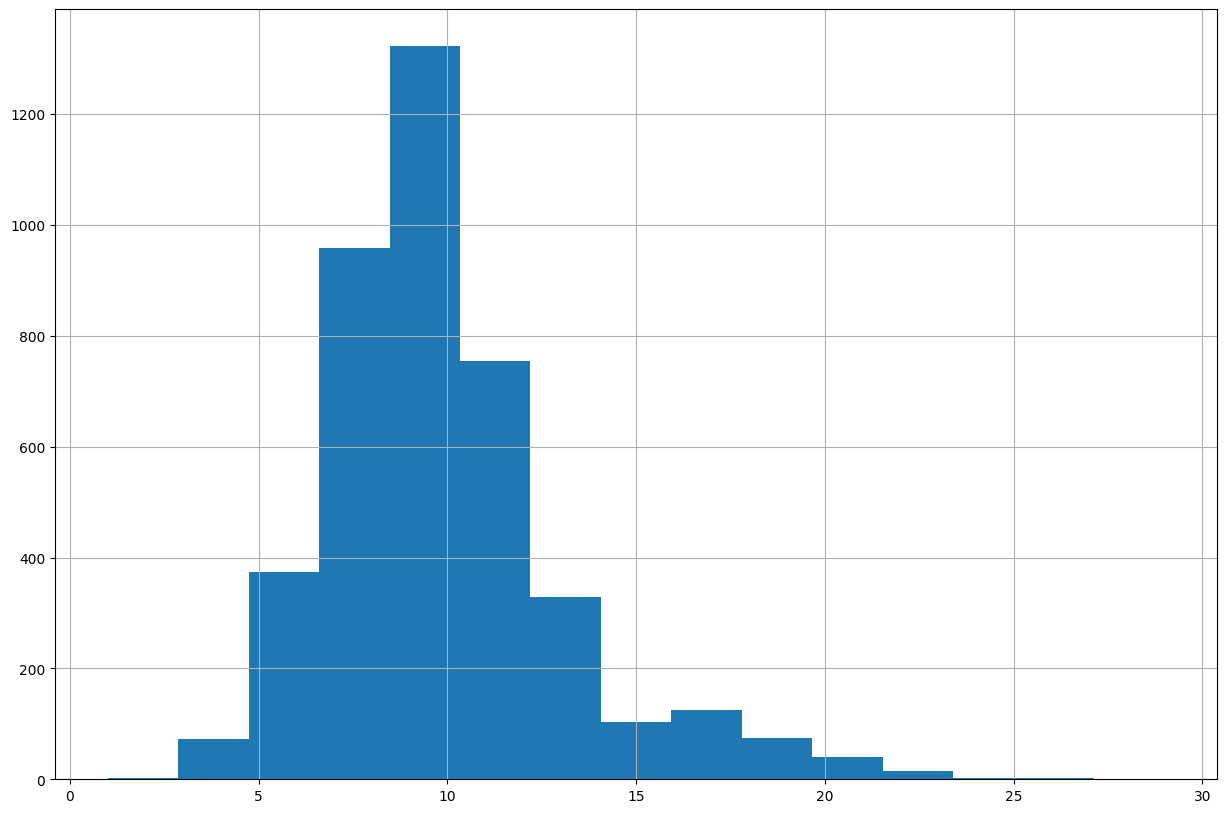

In [75]:
plt.figure(figsize=(15, 10))

# Take a look at the rings
abalone_df["Rings"].hist(bins=15)
plt.show()

Most abalones have between five and fifteen rings, but that it is possible to get up to twenty-five rings. The older abalones are underrepresented in this dataset. This seems intuitive, as age distributions are generally skewed like this due to natural processes.

A second relevant exploration is to find out which of the variables, if any, have a strong correlation with the age. A strong correlation between an independent variable and your goal will be a good sign, as this would confirm that physical measurements and age are related.

In [12]:
correlation_matrix = abalone_df.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

The closer the correlation values are to 1, the more correlation there is.

We can conclude that there's at least some correlation between physcial measurements of adult abalines and their age, yet it's also not very high. Very high correlations mean that you can expect a straightforward modeling process. In this case, you'll have to try and see what results you can obtain using the kNN algorithm.

# A Step-by-Step kNN from Scratch

## Plain English Walkthrough of the kNN Algorithm

The kNN algorithm is a little bit atypical as compared to other machine learning algorithms. The specificity of the k-Nearest Neighbors algorithm is that this formula is computed not at the moment of fitting but rather at the moment of prediction. This is not the case for most other models.

When a new data point arrives, the kNn algorithm, as the name indicates, will start by finding the nearest neighbors of this new data point. Then, it takes the values of those neighbords and uses them as a prediction for the new data point. 

As an intuitive example of why this works, think of your neighbors. You neighbors are often relatively similar to you. They're probably in the same socioeconomic class as you. Maybe they have the same type of work as you, maybe their children go to the same school as yours, and so on. But for some tasks, this kind of approach is not useful. For instance, it wouldn't make any sense to look your neighbor's favorite color to predict yours.

The kNN algorithm is based onthe notion that you can predict the features of a data point based on the features of its neighbors. In some cases, this method of prediction may be successful, while in other cases it may not.

## Define **Nearest** using a mathematical definition of distance

To find the data points that are closest to the point that you need to predict, you can use a mathematical definition of Euclidean Distance. The Euclidean Distance is given by the following formula:

$$
d(p,q)=\sqrt{\sum\limits_{i=1}^{n}(q_{i}-p_{i})^{2}}
$$

where 
- $p,q$ = two points in Euclidean n-space,
- $q_{i},p_{i}$ = Euclidean vectors, starting from the origin of the space, and
- $n$ = n-space.

(It's literally the Pythagorean Theorem on a Euclidean space. Lol.)

We use Python's `linalg.norm()` to calculate this, or we can manually calculate it.

In [13]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [16]:
np.sqrt(((b[0] - a[0]) ** 2) + ((b[1] - a[1]) ** 2))

2.8284271247461903

## Find the k Nearest Neighbors

We need to find a number of neighbors, and that number is given by `k`. The minimum value of `k` is 1. This means using only one neighbor for the prediction. The maximum is the number of data points that you have. This means using all the neighbors. The value of `k` is something that the user defines. Optimization tools can help us with this.

In [17]:
X = abalone_df.drop("Rings", axis=1)
X = X.values
y = abalone_df["Rings"]
y = y.values

In [18]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [19]:
y

array([15,  7,  9, ...,  9, 10, 12])

We apply a kNN with `k = 3` on a new abalone that has the following physical measurements:

| Variable          | Value    |
|:-----------------:|:--------:|
| Length            | 0.569552 |
| Diameter          | 0.446407 |
| Height            | 0.154437 |
| Whole weight      | 1.016849 |
| Shucked weight    | 0.439051 |
| Viscera weight    | 0.222526 |
| Shell weight      | 0.291208 |

In [21]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208
])

In [23]:
# compute the distances between this new data point and each of the data points in the Abalone Dataset

distances = np.linalg.norm(X - new_data_point, axis=1)

distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

We now have a vector of distances and we need to find out which are the three closest neighbors. To do this, we need to find the IDs of the minimum distances. We can use the `.argsort()` to sort the array from lowest to highest, and we can take the first `k` elements to obtain the indices of the k nearest neighbors.

In [24]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

## Voting or Averaging of Multiple Neighbors

Having identified the indices of the three nearest neighbors of the abalone of unknown age, we need to combine those neighbors into a prediction for the new datapoint.

In [26]:
# first, find the ground truths for those three neighbors:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

## Average for Regression

In regression problems, the target variable is numeric. You combine multiple neighbors into one prediction by taking the average of their values of the target variable.

In [29]:
prediction = nearest_neighbor_rings.mean()
prediction

10.0

This means that the 3-nearest neighbors prediction for the new datapoint is 10.

## Mode for Classification

In classification problems, the target variable is categorical. Instead of averages, you take the **mode**. The mode is the value that occurs most often. This means that you count the classes of all the neighbors, and you retain the most common class. The prediction is the value that occurs most often among the neighbors.

If there are multiple modes, there are multiple solutions. You could select a final winner randomly from the winners. You could also make the final decision based on the distances of the neighbors, in which case the mode of the closest neighbors would be retained. 

We compute the mode using pandas' `df.value_counts()` function.

In [50]:
class_neighbors = pd.DataFrame(data = {"class_1" : ["A", "B", "B", "B", "B", "B", "C", "C", "C", "D"]})
class_neighbors["class_1"].value_counts()

class_1
B    5
C    3
A    1
D    1
Name: count, dtype: int64

# Fit kNN using scikit-learn

## Splitting data into Training and Test Sets for Model Evaluation

There are multiple ways of evaluation models, but the most common one is the train-test split. When usin a train-test split for model evaluation, you split the dataset into two parts:
1. **Training data** is used to fit the model. For kNN, this means that the training data will be used as neighbors.
2. **Test data** is used to evaluate the model. It means that you'll make predictions for the number of rings of each of the abalones in the test data and compare those results to the known true number of rings.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

The `test_size` refers to the number of observations that you want to put in the training data and the test data. If you specify a `test_size` of `0.2`, your `test_size` will be 20 percent of the original data, therefore leaving the other 80 percent as the training data.

The `random_state` is a parameter that allows you to obtain the same results every time the code is run. `train_test_split()` makes a random split in the data, which is problematic for reproducing the results. Therefore, it is common to use `random_state`. The choice of value in `random_state` is arbitrary.

## Fitting a kNN Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [56]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Using scikit-learn to Inspect Model Fit

There are many evaluation metrics avaiable for regression, but we'll use one of the most common ones, the **root-mean-square error (RMSE)**. The RMSE of a prediction is computed as follows:
1. Compute the difference between each data point's actual value and predicted value.
2. For each difference, take the square of this difference.
3. Sum all of the squared differences.
4. Take the square root of the summed value.

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [58]:
train_preds = knn_model.predict(X_train)

In [59]:
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In this code, we computed the RMSE using the `knn_model` that were fitted in the previous code block. We compute the RMSE on the training data for now. 

For a more realistic result, we evaluate the performances on data that aren’t included in the model. This is why the test set was kept separated. We evaluate the predictive performances on the test set with the same function as before:

In [60]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

We observe a relatively large difference between the RMSE on the training data and the RMSE on the test data. This means that the model suffers from overfitting on the training data: it does not generalize well.

## Plotting the Fit of the Model

A last thing to look at before starting to improve the model is the actual fit of the model. To understand what the model has learned, we can visualize how the predictions have been made using `matplotlib`.

In [61]:
import seaborn as sns

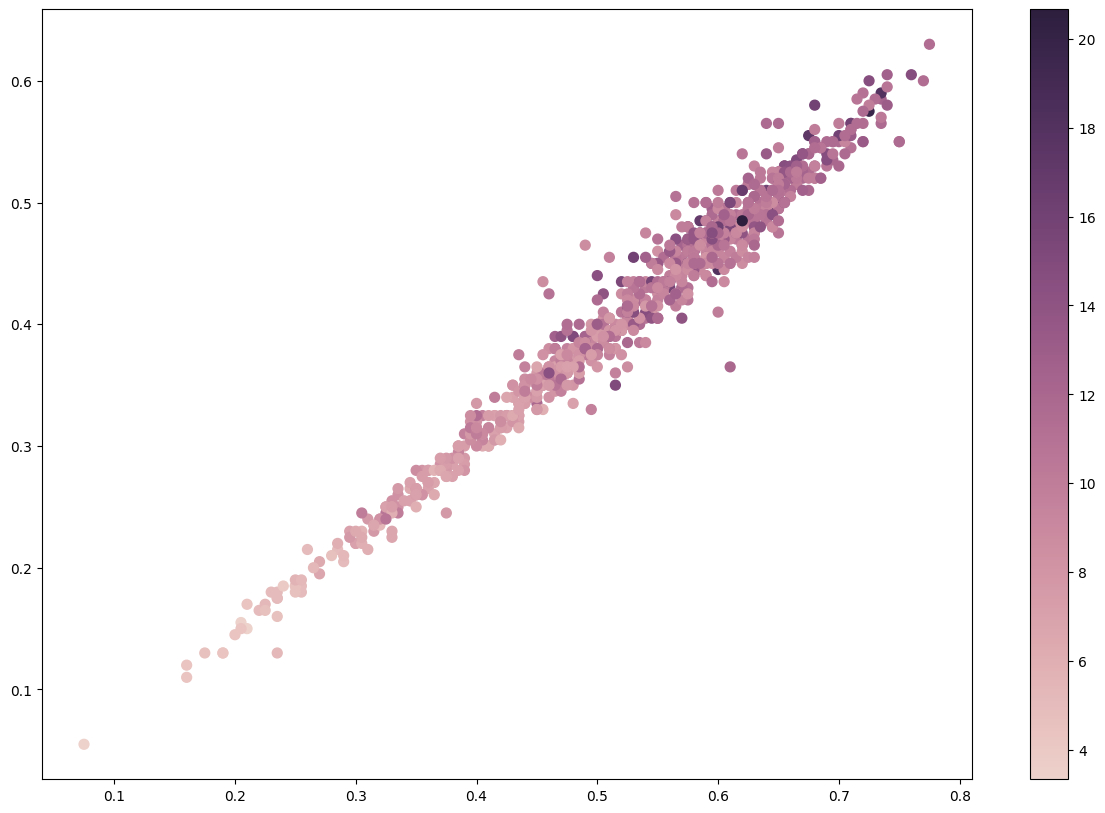

In [77]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(15, 10))

points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Remember, the first two columns are `Length` and `Diameter` and that they are strongly correlated, as we saw in the correlations table.
We use `c` to speciy that the predicted values (`test_preds`) should be used as a color bar. The argument `s` is used to specify the size of the points in the scatter plot. We use `cmap` to specify the `cubehelex_palette` color map.

On the graph, each point is an abalone from the test set, with its actual length on the X-axis and the actual diameter on the Y-axis. The color of the point reflects the predicted age. We see that the longer and larger an abalone is, the higher its predicted age. This is logical, and it's a positive sign. It means that the model is learning someting that seems correct.

To confirm whether this trend exists in actual abalone data, we can do the same for the actual values by simply replacing the variable that is used for `c`.

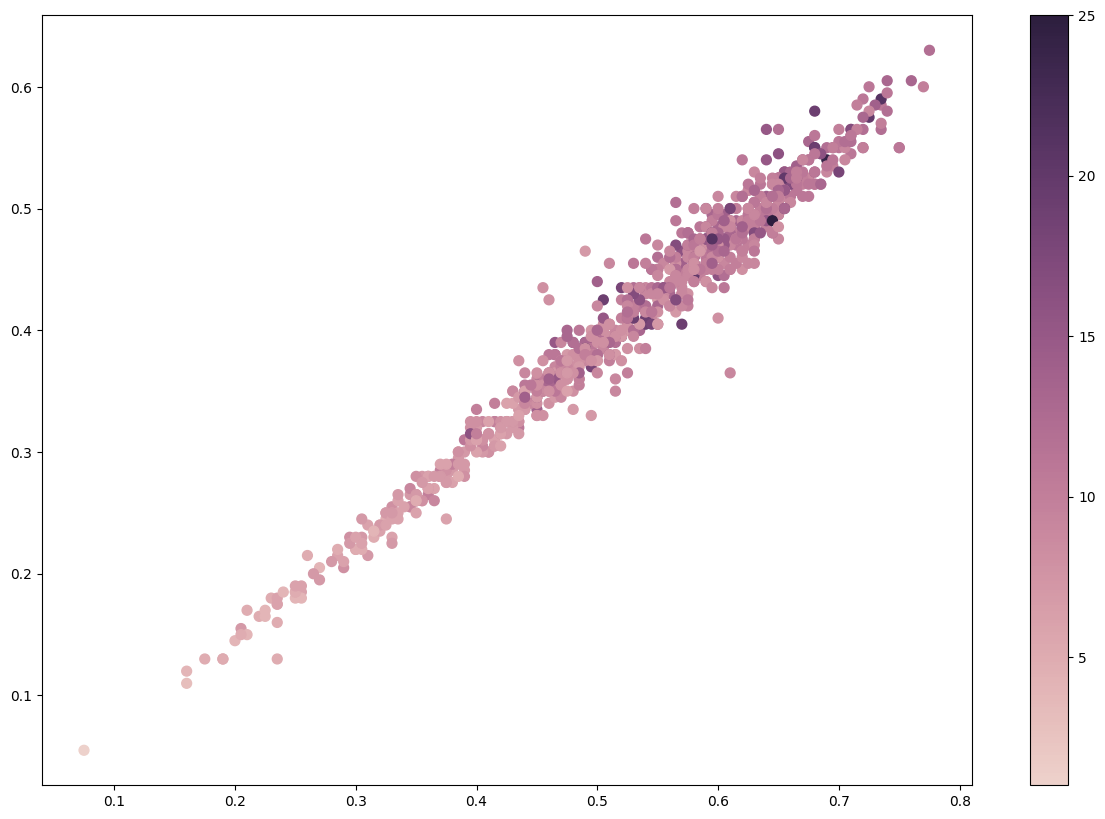

In [78]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(15, 10))

points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()